In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import importlib

from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
!pip install lightgbm

In [3]:
import lightgbm as lgb

In [4]:
import pva
importlib.reload(pva)

plot_precision_curve = pva.plot_precision_curve

In [5]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
y = data['SalePrice']
X = data.drop(labels='SalePrice', axis='columns')

In [7]:
X.drop(labels='Id', axis='columns', inplace=True)
nan_cols = [col for col in X.columns if X[col].hasnans]
X.drop(labels=nan_cols, axis='columns', inplace=True)

X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [8]:
num_features = [col for col in X.columns if X[col].dtype != 'object']
cat_features = [col for col in X.columns if X[col].dtype == 'object']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('num', StandardScaler(), num_features),
])

pl = Pipeline([
    ('preprocessor', ct),
    ('regressor', Ridge(alpha=1e-1))
])

ridge = pl.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

Text(0.5, 1.0, 'Distribution of actual and predicted values')

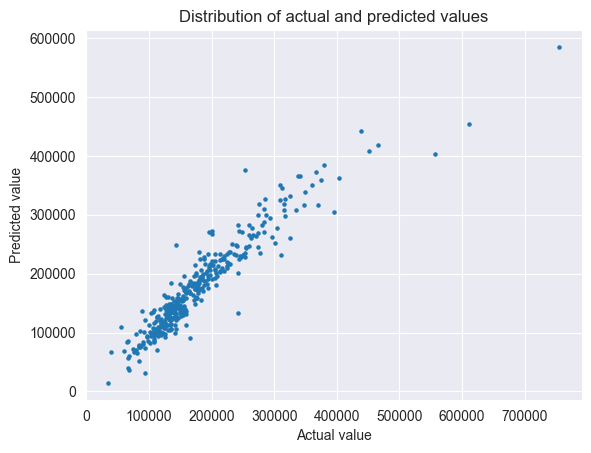

In [11]:
plt.scatter(y_test, ridge_pred, s=5)

plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.title('Distribution of actual and predicted values')

In [12]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('num', StandardScaler(), num_features),
])

pl = Pipeline([
    ('preprocessor', ct),
    ('regressor', SVR(kernel='linear', C=1.0))
])

svm = pl.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

Text(0.5, 1.0, 'Distribution of actual and predicted values')

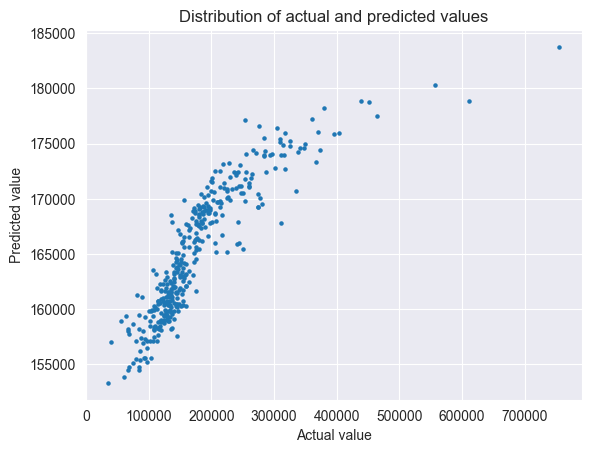

In [13]:
plt.scatter(y_test, svm_pred, s=5)

plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.title('Distribution of actual and predicted values')

In [14]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('num', StandardScaler(), num_features),
])

pl = Pipeline([
    ('preprocessor', ct),
    ('regressor', lgb.LGBMRegressor(
        num_leaves=31, max_depth=-1,
        learning_rate=0.1,
        n_estimators=250,
        n_jobs=-1,
    ))
])

lgbm = pl.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2748
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 126
[LightGBM] [Info] Start training from score 181712.286758


Text(0.5, 1.0, 'Distribution of actual and predicted values')

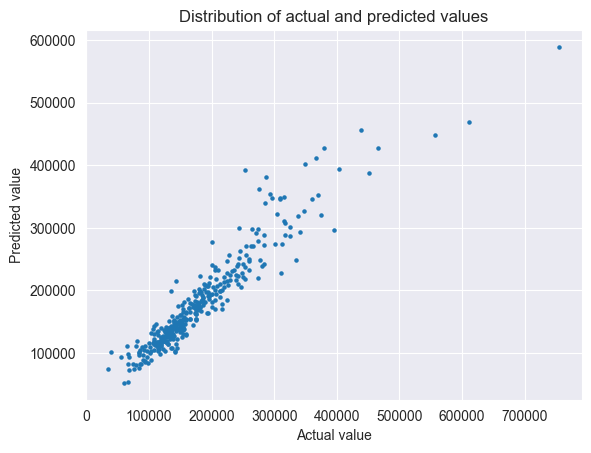

In [15]:
plt.scatter(y_test, lgbm_pred, s=5)

plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.title('Distribution of actual and predicted values')

In [16]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('num', StandardScaler(), num_features),
])

pl = Pipeline([
    ('preprocessor', ct),
    ('regressor', RandomForestRegressor(
        n_estimators=250,
        max_depth=None,
        n_jobs=-1
    ))
])

rf = pl.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

Text(0.5, 1.0, 'Distribution of actual and predicted values')

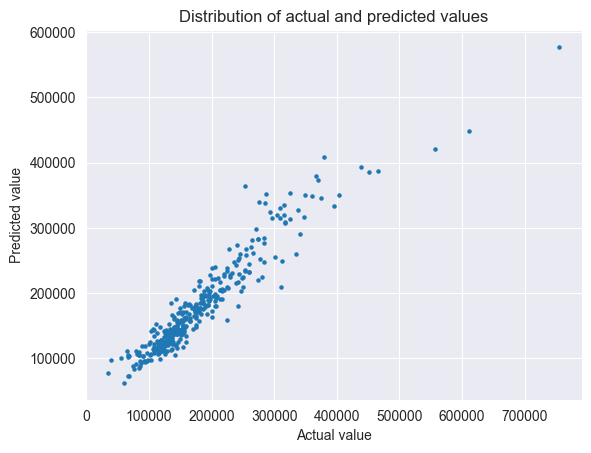

In [17]:
plt.scatter(y_test, rf_pred, s=5)

plt.xlabel("Actual value")
plt.ylabel("Predicted value")

plt.title('Distribution of actual and predicted values')

Text(0, 0.5, 'Predicted values')

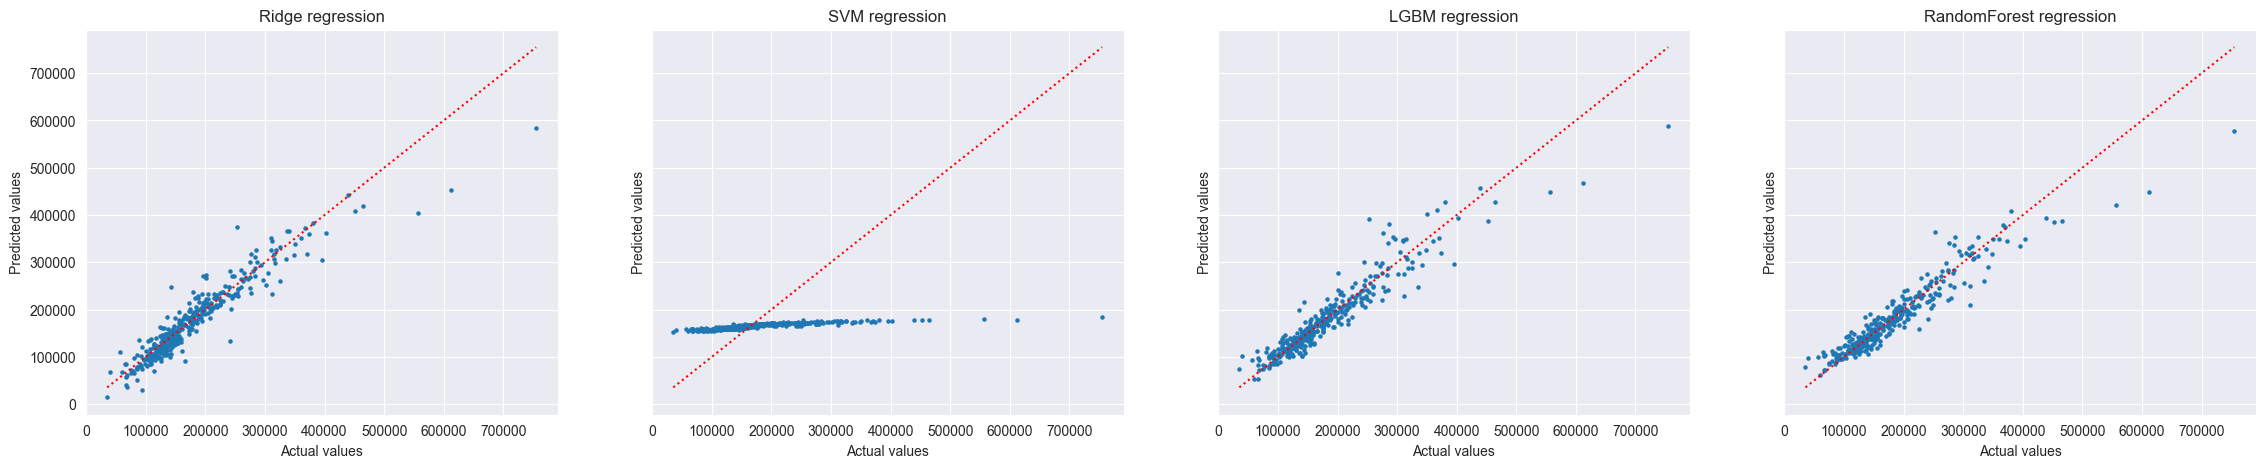

In [18]:
_, ax = plt.subplots(ncols=4, figsize=(28, 5), sharey=True)

ax[0].scatter(y_test, ridge_pred, s=5)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')
ax[0].set_title('Ridge regression')
ax[1].scatter(y_test, svm_pred, s=5, label='SVM regression')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')
ax[1].set_title('SVM regression')
ax[2].scatter(y_test, lgbm_pred, s=5, label='LGBM regression')
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')
ax[2].set_title('LGBM regression')
ax[3].scatter(y_test, rf_pred, s=5, label='RandomForest regression')
ax[3].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')
ax[3].set_title('RandomForest regression')

ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')
ax[2].set_xlabel('Actual values')
ax[2].set_ylabel('Predicted values')
ax[3].set_xlabel('Actual values')
ax[3].set_ylabel('Predicted values')

Text(0.5, 1.0, 'RandomForest regression')

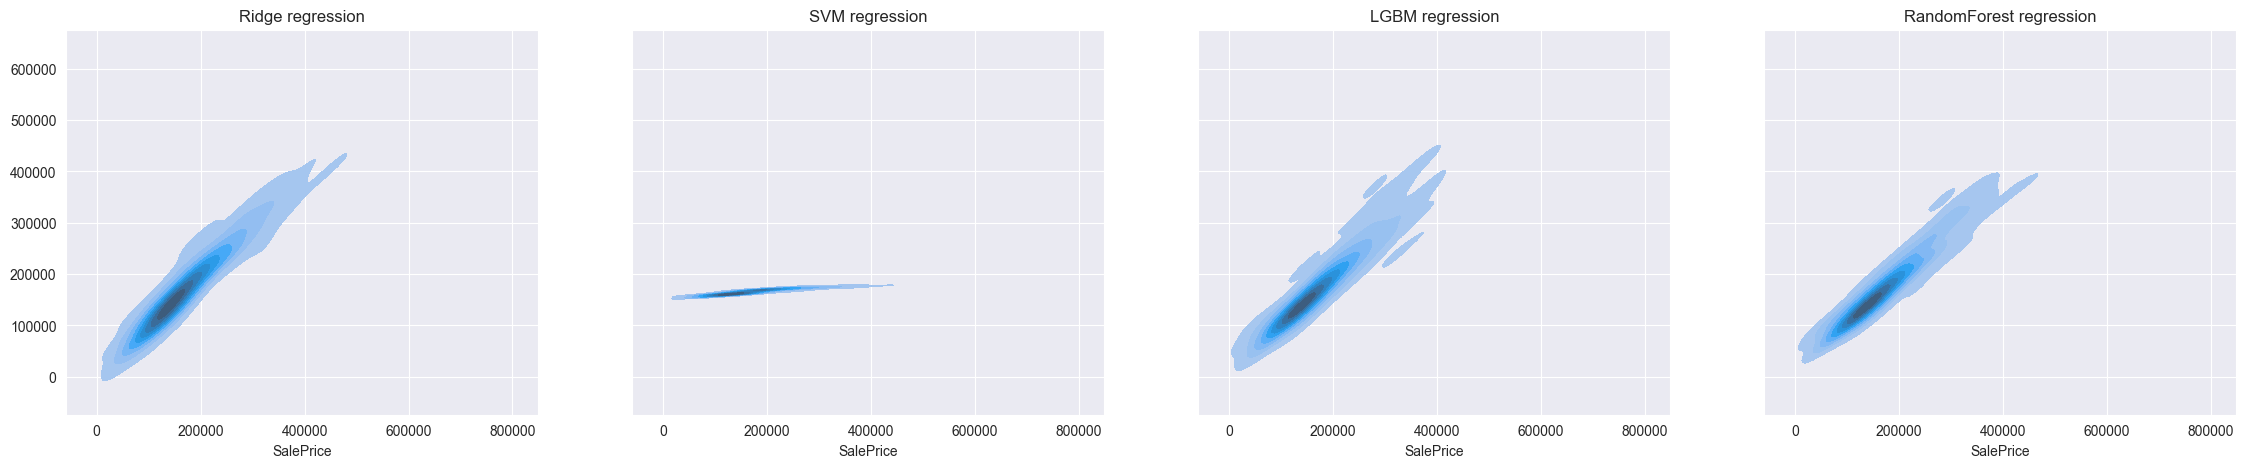

In [19]:
_, ax = plt.subplots(ncols=4, figsize=(28, 5), sharey=True)

sns.kdeplot(x=y_test, y=ridge_pred, fill=True, ax=ax[0])
sns.kdeplot(x=y_test, y=svm_pred, fill=True, ax=ax[1])
sns.kdeplot(x=y_test, y=lgbm_pred, fill=True, ax=ax[2])
sns.kdeplot(x=y_test, y=rf_pred, fill=True, ax=ax[3])

ax[0].set_title('Ridge regression')
ax[1].set_title('SVM regression')
ax[2].set_title('LGBM regression')
ax[3].set_title('RandomForest regression')

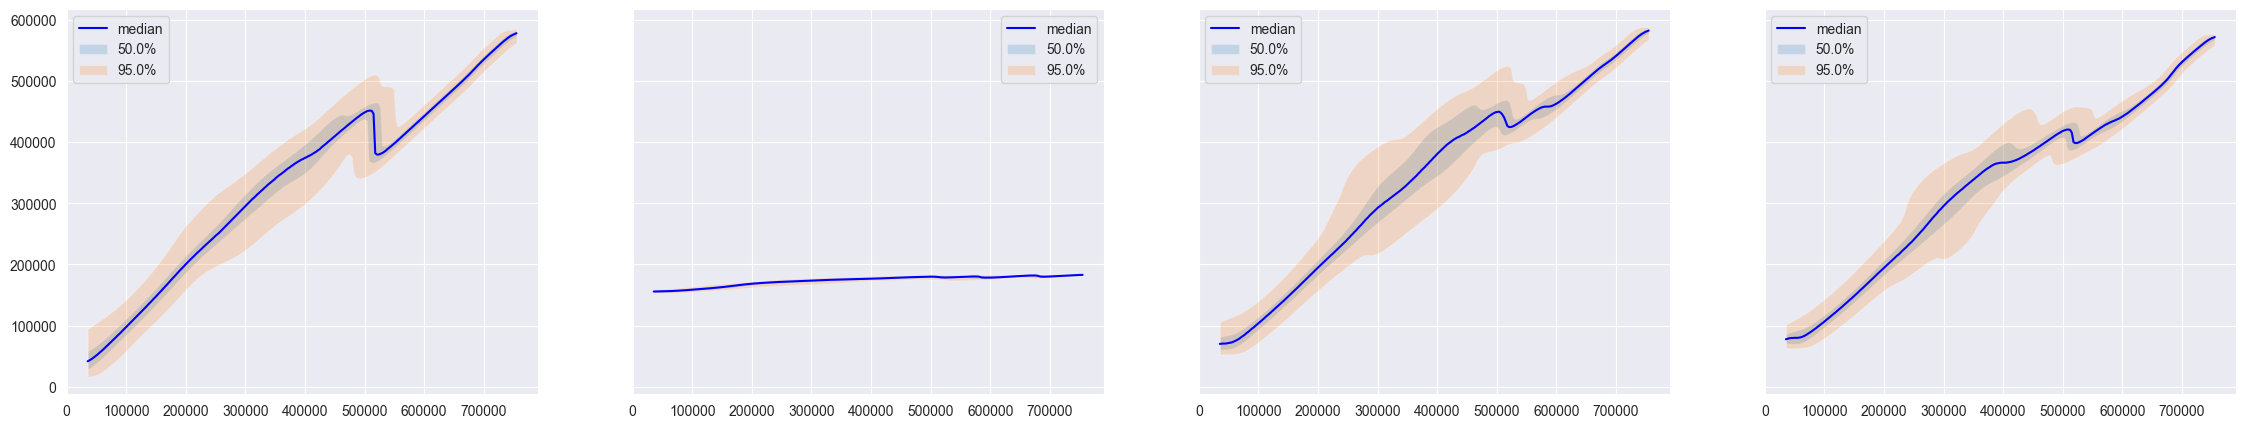

In [20]:
_, ax = plt.subplots(ncols=4, figsize=(28, 5), sharey=True)

plot_precision_curve(y_true=y_test, y_pred=ridge_pred, ax=ax[0])
plot_precision_curve(y_true=y_test, y_pred=svm_pred, ax=ax[1])
plot_precision_curve(y_true=y_test, y_pred=lgbm_pred, ax=ax[2])
plot_precision_curve(y_true=y_test, y_pred=rf_pred, ax=ax[3])

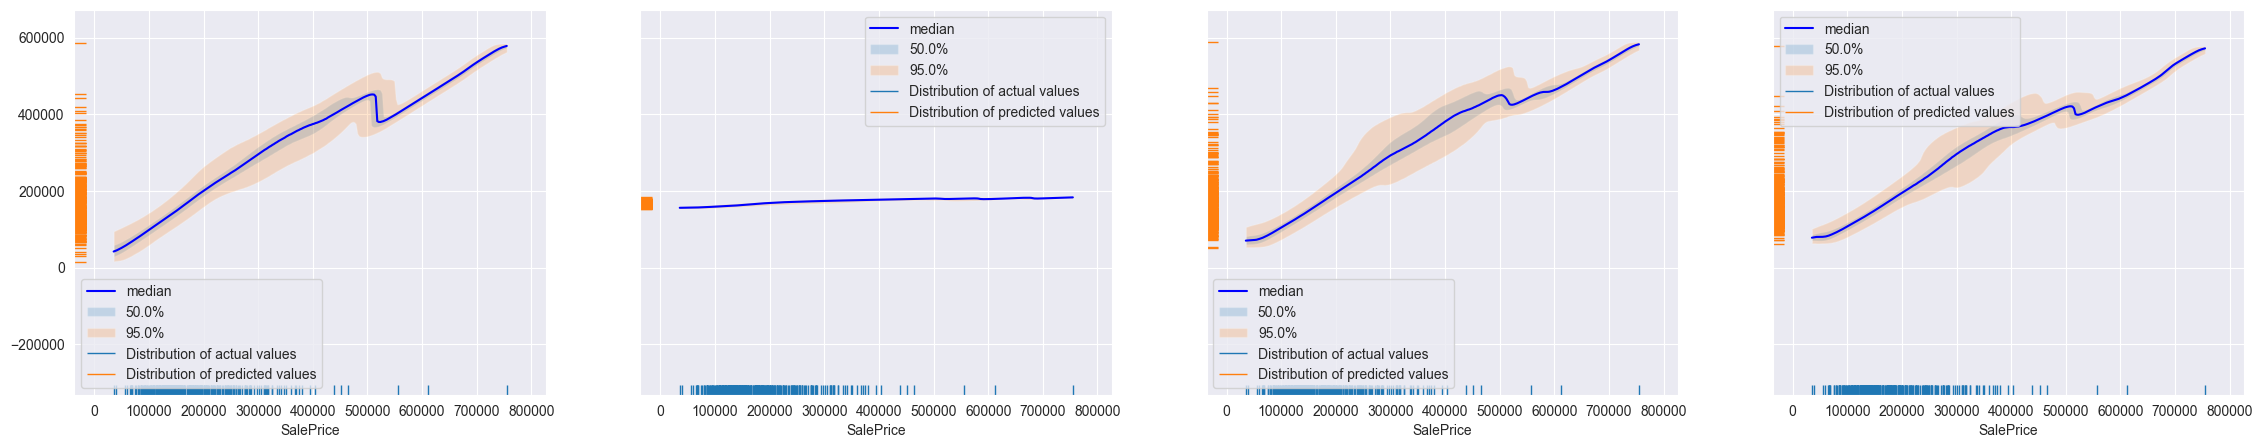

In [21]:
_, ax = plt.subplots(ncols=4, figsize=(28, 5), sharey=True)

plot_precision_curve(y_true=y_test, y_pred=ridge_pred, ax=ax[0], rug_plot=True)
plot_precision_curve(y_true=y_test, y_pred=svm_pred, ax=ax[1], rug_plot=True)
plot_precision_curve(y_true=y_test, y_pred=lgbm_pred, ax=ax[2], rug_plot=True)
plot_precision_curve(y_true=y_test, y_pred=rf_pred, ax=ax[3], rug_plot=True)

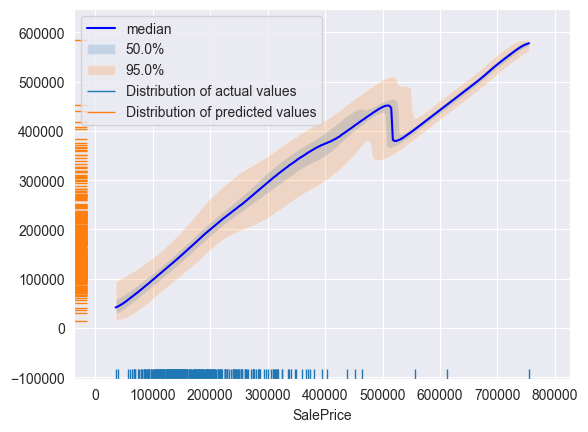

In [22]:
_, ax = plt.subplots()

pva.plot_precision_curve(y_true=y_test, y_pred=ridge_pred, ax=ax, rug_plot=False)
sns.rugplot(x=y_test, ax=ax, label='Distribution of actual values')
sns.rugplot(y=ridge_pred, ax=ax, label='Distribution of predicted values')

ax.legend()